In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [2]:
BSinfo = pd.read_csv('Dataset/BSinfo.csv')
CLdata = pd.read_csv('Dataset/CLdata.csv')
ECdata = pd.read_csv('Dataset/ECdata.csv')
sample_submssion = pd.read_csv('Dataset/SampleSubmission.csv')

In [3]:
# Define the WMAPE function
def wmape(y_true, y_pred):
    weights = np.abs(y_true)
    wmape = np.sum(np.abs(y_true - y_pred) / weights) * 100.0 / np.sum(weights)
    return wmape

In [4]:
ECdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    92629 non-null  object 
 1   BS      92629 non-null  object 
 2   Energy  92629 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


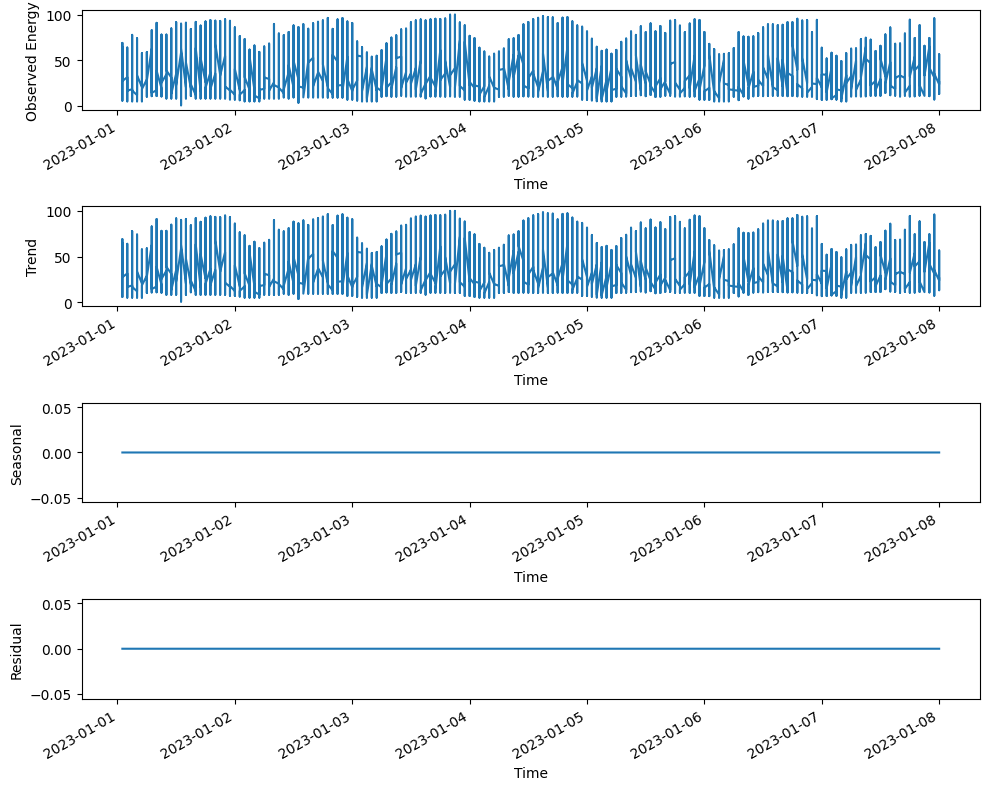

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset using pandas
data = pd.read_csv('Dataset/ECdata.csv', parse_dates=['Time'], index_col='Time')

# Assuming 'BS' columns contain values like 'B_0', 'B_1', etc.
# Replace 'BS' with the actual column name in your dataset

# Perform seasonal decomposition on 'Energy' column
result = seasonal_decompose(data['Energy'], model='additive', period=1)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
data['Energy'].plot(ax=ax1)
ax1.set_ylabel('Observed Energy')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()


In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset using pandas
data = pd.read_csv('Dataset/ECdata.csv', parse_dates=['Time'], index_col='Time')
# print(data.head())
# data_filtered = data.loc[data['BS'] == 'B_0']
# # Resample data to ensure hourly frequency
# data_resampled = data_filtered.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

# # Interpolate missing values
# data_interpolated = data_resampled.interpolate(method='linear')  # You can use other interpolation methods as well

# # Perform seasonal decomposition on interpolated data
# result = seasonal_decompose(data_interpolated['Energy'], model='additive', period=24)  # Assuming 24 hours in a day

# # Plot the decomposed components
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
# data_interpolated['Energy'].plot(ax=ax1)
# ax1.set_ylabel('Observed Energy')
# result.trend.plot(ax=ax2)
# ax2.set_ylabel('Trend')
# result.seasonal.plot(ax=ax3)
# ax3.set_ylabel('Seasonal')
# result.resid.plot(ax=ax4)
# ax4.set_ylabel('Residual')
# plt.tight_layout()
# plt.show()

data.head()

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812


In [28]:
FilteredData = data[data["BS"] == "B_0"].head()
BS1Data = FilteredData.drop(['BS'], axis=1)
BS1Data

,Energy
Time,
2023-01-01 01:00:00,64.275037
2023-01-01 02:00:00,55.904335
2023-01-01 03:00:00,57.698057
2023-01-01 04:00:00,55.156951
2023-01-01 05:00:00,56.053812


In [29]:
# Resample data to ensure hourly frequency
data_resampled = BS1Data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

# Interpolate missing values
data_interpolated = data_resampled.interpolate(method='linear')  # You can use other interpolation methods as well

# Perform seasonal decomposition on interpolated data
result = seasonal_decompose(data_interpolated['Energy'], model='additive', period=24)  # Assuming 24 hours in a day

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
data_interpolated['Energy'].plot(ax=ax1)
ax1.set_ylabel('Observed Energy')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

ValueError: x must have 2 complete cycles requires 48 observations. x only has 5 observation(s)

In [33]:
ECdata.head()

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812


In [7]:
sample_submssion.drop(['w'], axis=1, inplace=True)

In [8]:
sample_submssion.head()

,Time,BS,Energy
0,2023-01-01 06:00:00,B_0,NaN
1,2023-01-01 11:00:00,B_0,NaN
2,2023-01-01 12:00:00,B_0,NaN
3,2023-01-01 13:00:00,B_0,NaN
4,2023-01-01 23:00:00,B_0,NaN


In [9]:
#merge ECdata and sample_submssion
FullData = pd.merge(ECdata, sample_submssion, on=('Time','Energy','BS'), how='left')

In [11]:
FullData.head(10)

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
5,1/1/2023 7:00,B_0,82.959641
6,1/1/2023 8:00,B_0,91.031390
7,1/1/2023 9:00,B_0,78.176383
8,1/1/2023 10:00,B_0,72.645740
9,1/1/2023 14:00,B_0,66.666667


In [14]:
FullData[FullData['BS'] == 'B_0'].head(10)

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
5,1/1/2023 7:00,B_0,82.959641
6,1/1/2023 8:00,B_0,91.031390
7,1/1/2023 9:00,B_0,78.176383
8,1/1/2023 10:00,B_0,72.645740
9,1/1/2023 14:00,B_0,66.666667


In [15]:
ECdata[ECdata['BS'] == 'B_0'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    113 non-null    object 
 1   BS      113 non-null    object 
 2   Energy  113 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [22]:
ECdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    92629 non-null  object 
 1   BS      92629 non-null  object 
 2   Energy  92629 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


In [76]:
sample_submssion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26139 entries, 0 to 26138
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    26139 non-null  datetime64[ns]
 1   BS      26139 non-null  object        
 2   Energy  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.8+ KB


In [25]:
# change the Time column into datetime format
ECdata['Time'] = pd.to_datetime(ECdata['Time'])
ECdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    92629 non-null  datetime64[ns]
 1   BS      92629 non-null  object        
 2   Energy  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ MB


In [26]:
sample_submssion['Time'] = pd.to_datetime(sample_submssion['Time'])
sample_submssion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26139 entries, 0 to 26138
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    26139 non-null  datetime64[ns]
 1   BS      26139 non-null  object        
 2   Energy  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.8+ KB


In [27]:
import pandas as pd

# Assuming you have 'train_data' and 'test_data' DataFrames
combined_data = pd.concat([ECdata, sample_submssion], axis=0, ignore_index=True)

In [29]:
# sort combined_data dataframe by Time
combined_data.set_index('Time', inplace=True)

combined_data.sort_values(by=['BS', 'Time'], inplace=True)

In [31]:
combined_data.head(20)

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812
2023-01-01 06:00:00,B_0,NaN
2023-01-01 07:00:00,B_0,82.959641
2023-01-01 08:00:00,B_0,91.031390
2023-01-01 09:00:00,B_0,78.176383


In [32]:
combined_data.tail(10)

,BS,Energy
Time,,
2023-01-02 14:00:00,B_999,NaN
2023-01-02 15:00:00,B_999,10.463378
2023-01-02 16:00:00,B_999,10.762332
2023-01-02 17:00:00,B_999,10.313901
2023-01-02 18:00:00,B_999,10.164425
2023-01-02 19:00:00,B_999,NaN
2023-01-02 20:00:00,B_999,NaN
2023-01-02 21:00:00,B_999,10.014948
2023-01-02 22:00:00,B_999,NaN


In [43]:
BS1Data.columns

Index(['BS', 'Energy'], dtype='object')

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812
2023-01-01 06:00:00,B_0,NaN
2023-01-01 07:00:00,B_0,82.959641
2023-01-01 08:00:00,B_0,91.031390
2023-01-01 09:00:00,B_0,78.176383


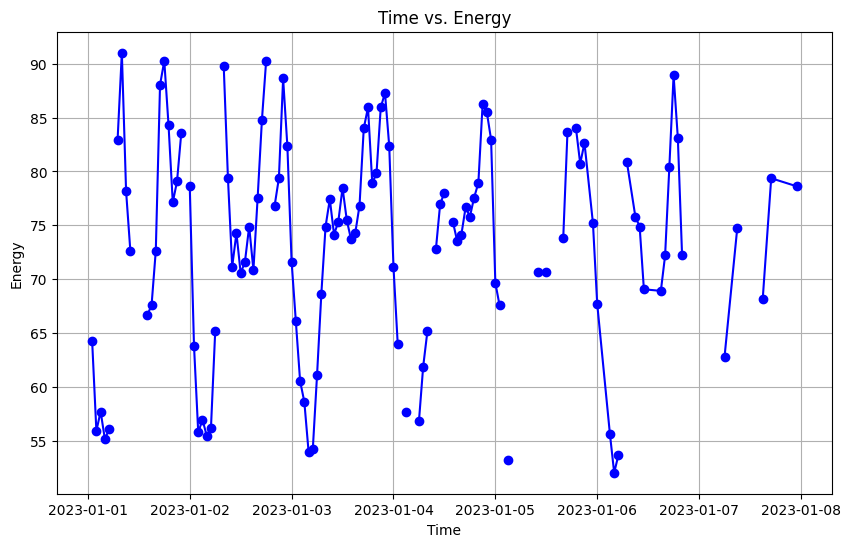

In [44]:
# plot the BS1Data 
import matplotlib.pyplot as plt

# Assuming BS1Data is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting Time vs. Energy
plt.plot(BS1Data.index, BS1Data['Energy'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Time vs. Energy')

# Display the plot
plt.grid(True)
plt.show()

In [51]:
BS1Data.drop()

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812


In [57]:
filtered_data = BS1Data.drop('BS',axis = 1)

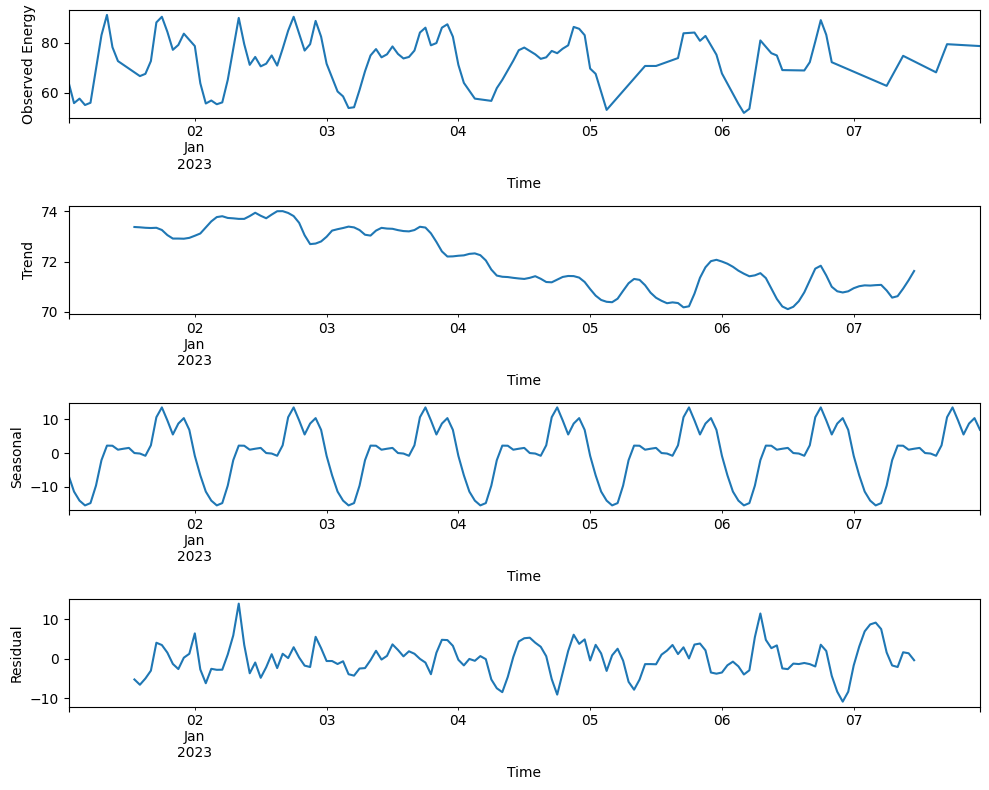

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812


In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



data_resampled = filtered_data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

# Interpolate missing values
data_interpolated = data_resampled.interpolate(method='linear')  # You can use other interpolation methods as well

# Perform seasonal decomposition on interpolated data
result = seasonal_decompose(data_interpolated['Energy'], model='additive', period=24)  # Assuming 24 hours in a day

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
data_interpolated['Energy'].plot(ax=ax1)
ax1.set_ylabel('Observed Energy')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

data.head()

,Energy
Time,
2023-01-01 01:00:00,64.275037
2023-01-01 02:00:00,55.904335
2023-01-01 03:00:00,57.698057
2023-01-01 04:00:00,55.156951
2023-01-01 05:00:00,56.053812
2023-01-01 06:00:00,69.506726
2023-01-01 07:00:00,82.959641
2023-01-01 08:00:00,91.031390
2023-01-01 09:00:00,78.176383


In [60]:
import pandas as pd

# Assuming you have 'train_data' and 'test_data' DataFrames
combined_data = pd.concat([ECdata, sample_submssion], axis=0, ignore_index=True)
# sort combined_data dataframe by Time
combined_data.set_index('Time', inplace=True)

combined_data.sort_values(by=['BS', 'Time'], inplace=True)

# Get unique BS values
unique_bs_values = combined_data['BS'].unique()

# Dictionary to store interpolated data for each BS value
interpolated_data_by_bs = {}

# Loop through each unique BS value
for bs_value in unique_bs_values:
    bs_data = combined_data[combined_data['BS'] == bs_value]
    filtered_data = bs_data.drop('BS', axis=1)
    data_resampled = filtered_data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

    # Interpolate missing values
    data_interpolated = data_resampled.interpolate(method='linear')
    
    # Store interpolated data in the dictionary
    interpolated_data_by_bs[bs_value] = data_interpolated

# Now, interpolated_data_by_bs contains interpolated data for each BS value
# You can access each BS value's data using interpolated_data_by_bs[bs_value]


In [65]:
import pandas as pd

# Assuming you have 'train_data' and 'test_data' DataFrames
combined_data = pd.concat([ECdata, sample_submssion], axis=0, ignore_index=True)
# sort combined_data dataframe by Time
combined_data.set_index('Time', inplace=True)

combined_data.sort_values(by=['BS', 'Time'], inplace=True)

# Get unique BS values
unique_bs_values = combined_data['BS'].unique()

# Dictionary to store interpolated DataFrames for each BS value
interpolated_dfs_by_bs = {}

# Loop through each unique BS value
for bs_value in unique_bs_values:
    bs_data = combined_data[combined_data['BS'] == bs_value]
    filtered_data = bs_data.drop('BS', axis=1)
    data_resampled = filtered_data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

    # Interpolate missing values
    data_interpolated = data_resampled.interpolate(method='linear')
    
    # Store interpolated data as a DataFrame with Time as index
    interpolated_df = pd.DataFrame(data_interpolated['Energy'], columns=[bs_value])
    
    # Store the DataFrame in the dictionary
    interpolated_dfs_by_bs[bs_value] = interpolated_df

# Now, interpolated_dfs_by_bs contains DataFrames for each BS value
# Each DataFrame has 'Time' as the index and 'Energy' as the column value


In [70]:
import pandas as pd

# Assuming you have 'train_data' and 'test_data' DataFrames
combined_data = pd.concat([ECdata, sample_submssion], axis=0, ignore_index=True)
# sort combined_data dataframe by Time
combined_data.set_index('Time', inplace=True)

combined_data.sort_values(by=['BS', 'Time'], inplace=True)

# Get unique BS values
unique_bs_values = combined_data['BS'].unique()

# Dictionary to store interpolated data for each BS value
interpolated_data_by_bs = {}

# Loop through each unique BS value
for bs_value in unique_bs_values:
    bs_data = combined_data[combined_data['BS'] == bs_value]
    filtered_data = bs_data.drop('BS', axis=1)
    data_resampled = filtered_data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

    # Interpolate missing values
    data_interpolated = data_resampled.interpolate(method='linear')
    
    # Store interpolated data in the dictionary
    interpolated_data_by_bs[bs_value] = data_interpolated

# Convert the dictionary of DataFrames into a single DataFrame
final_df = pd.concat(interpolated_data_by_bs.values(), axis=1, keys=interpolated_data_by_bs.keys())

# The final_df DataFrame will have Time as the index and columns for each BS value with Energy values


In [71]:
final_df.head()

,B_0,B_1,B_10,B_100,B_1000,B_1001,B_1002,B_1003,B_1004,B_1005,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy,...,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Energy
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 01:00:00,64.275037,18.086697,30.343797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 02:00:00,55.904335,18.086697,30.194320,15.844544,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,57.698057,18.086697,30.194320,15.844544,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 04:00:00,55.156951,16.143498,30.194320,15.844544,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 05:00:00,56.053812,15.545590,30.194320,15.994021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
import pandas as pd

# Assuming you have 'train_data' and 'test_data' DataFrames
combined_data = pd.concat([ECdata, sample_submssion], axis=0, ignore_index=True)
# sort combined_data dataframe by Time
combined_data.set_index('Time', inplace=True)

combined_data.sort_values(by=['BS', 'Time'], inplace=True)

# Get unique BS values
unique_bs_values = combined_data['BS'].unique()

# Dictionary to store interpolated data for each BS value
interpolated_data_by_bs = {}

# Loop through each unique BS value
for bs_value in unique_bs_values:
    bs_data = combined_data[combined_data['BS'] == bs_value]
    filtered_data = bs_data.drop('BS', axis=1)
    data_resampled = filtered_data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

    # Interpolate missing values
    data_interpolated = data_resampled.interpolate(method='linear')
    
    # Store interpolated data in the dictionary
    interpolated_data_by_bs[bs_value] = data_interpolated

# Convert the dictionary of DataFrames into a single DataFrame
final_dfs = []

for bs_value, df in interpolated_data_by_bs.items():
    df['BS'] = bs_value
    final_dfs.append(df)

final_df = pd.concat(final_dfs)

# The final_df DataFrame will have Time as the index, 'Energy' and 'BS' as columns


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140138 entries, 2023-01-01 01:00:00 to 2023-01-02 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Energy  136870 non-null  float64
 1   BS      140138 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


In [77]:
import pandas as pd

# Assuming you have 'train_data', 'test_data', 'sample_submission', and 'final_df'

# Merge or join the final_df with sample_submission on the 'Time' column
merged_df = pd.merge(sample_submssion, final_df, left_on='Time', right_index=True, how='inner')

# merged_df will contain entries from sample_submission with the same 'Time' as final_df's index
merged_df.head()

,Time,BS_x,Energy_x,Energy_y,BS_y
0,2023-01-01 06:00:00,B_0,NaN,69.506726,B_0
0,2023-01-01 06:00:00,B_0,NaN,15.994021,B_1
0,2023-01-01 06:00:00,B_0,NaN,30.343797,B_10
0,2023-01-01 06:00:00,B_0,NaN,16.143498,B_100
0,2023-01-01 06:00:00,B_0,NaN,15.545590,B_101


In [79]:
import pandas as pd

# Assuming you have 'train_data', 'test_data', 'sample_submission', and 'final_df'

# Merge the final_df with sample_submission on both 'Time' and 'BS' columns
merged_df = pd.merge(sample_submssion, final_df, on=['Time', 'BS'], how='inner')

# merged_df will contain entries from sample_submission with matching 'Time' and 'BS' values
# along with associated 'Energy' values from final_df


In [80]:
merged_df.head()

,Time,BS,Energy_x,Energy_y
0,2023-01-01 06:00:00,B_0,NaN,69.506726
1,2023-01-01 11:00:00,B_0,NaN,71.150972
2,2023-01-01 12:00:00,B_0,NaN,69.656203
3,2023-01-01 13:00:00,B_0,NaN,68.161435
4,2023-01-01 23:00:00,B_0,NaN,81.091181


In [81]:
merged_df.drop('Energy_x',axis=1,inplace=True)

In [82]:
merged_df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26139 entries, 0 to 26138
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      26139 non-null  datetime64[ns]
 1   BS        26139 non-null  object        
 2   Energy_y  22985 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.8+ KB


In [83]:
sample_submssion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26139 entries, 0 to 26138
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    26139 non-null  datetime64[ns]
 1   BS      26139 non-null  object        
 2   Energy  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.8+ KB


In [85]:
# replace null values with 0 in merged_df
merged_df.fillna(0, inplace=True)

In [86]:
merged_df.head()

,Time,BS,Energy_y
0,2023-01-01 06:00:00,B_0,69.506726
1,2023-01-01 11:00:00,B_0,71.150972
2,2023-01-01 12:00:00,B_0,69.656203
3,2023-01-01 13:00:00,B_0,68.161435
4,2023-01-01 23:00:00,B_0,81.091181


In [87]:
merged_df['Energy'] = merged_df['Energy_y']


In [88]:
merged_df.head()

,Time,BS,Energy_y,Energy
0,2023-01-01 06:00:00,B_0,69.506726,69.506726
1,2023-01-01 11:00:00,B_0,71.150972,71.150972
2,2023-01-01 12:00:00,B_0,69.656203,69.656203
3,2023-01-01 13:00:00,B_0,68.161435,68.161435
4,2023-01-01 23:00:00,B_0,81.091181,81.091181


In [89]:
merged_df.drop('Energy_y',axis=1, inplace = True)

In [90]:
merged_df.head()

,Time,BS,Energy
0,2023-01-01 06:00:00,B_0,69.506726
1,2023-01-01 11:00:00,B_0,71.150972
2,2023-01-01 12:00:00,B_0,69.656203
3,2023-01-01 13:00:00,B_0,68.161435
4,2023-01-01 23:00:00,B_0,81.091181


In [94]:
#combine the Time column and the BS column into one column name ID
merged_df['ID'] = merged_df['Time'].astype(str) + '_' + merged_df['BS']

#remove the Time and BS columns
merged_df.drop(['Time','BS'],axis=1,inplace=True)

#change the order of the columns

KeyError: 'Time'

In [95]:
merged_df = merged_df[['ID','Energy']]


In [97]:
output_csv_path = 'SampleSubmission_25.csv'
merged_df.to_csv(output_csv_path, index=False)